In [68]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings
%matplotlib inline

In [69]:
Path = '../../data/firstRound_4h.csv'
df = pd.read_csv(Path)
df.head()

,Unnamed: 0,RBS,Name,Rep1,Rep2,Rep3,AVERAGE,STD,PERC,Group,RBS6,Change_Pos,Base
0,0,TTTAAGAAGGAGATATACAT,RBS_1by1_0,3.194925,2.783529,1.798618,2.592357,0.717515,0.246643,bps,AGGAGA,1.0,T
1,1,CTTAAGAAGGAGATATACAT,RBS_1by1_1,1.844257,1.678119,1.290106,1.604161,0.284382,0.185590,bps,AGGAGA,1.0,C
2,2,GTTAAGAAGGAGATATACAT,RBS_1by1_2,0.674610,0.670263,0.643113,0.662662,0.017069,0.147150,bps,AGGAGA,1.0,G
3,3,ATTAAGAAGGAGATATACAT,RBS_1by1_3,1.986839,1.948917,1.101241,1.678999,0.500712,0.169798,bps,AGGAGA,1.0,A
4,4,TCTAAGAAGGAGATATACAT,RBS_1by1_4,1.830061,2.201733,0.983436,1.671743,0.624388,0.117162,bps,AGGAGA,2.0,C


In [70]:
Path2 = '../../data/First_round_results/CSVs/FirstRep1.csv'
df2 = pd.read_csv(Path2)
df2.set_index('Time',inplace=True)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A9,A10,A11,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time,,,,,,,,,,,,,,,,,,,,,
0:09:35,73,76,69,80,69,76,76,72,69,65,...,74,76,62,63,63,61,65,71,68,72
0:19:35,70,76,65,75,66,78,72,76,67,60,...,70,70,65,66,60,68,67,68,73,69
0:29:35,74,82,70,74,57,72,68,70,58,70,...,70,57,60,66,65,64,69,73,74,65
0:39:35,68,75,68,75,68,72,73,70,69,70,...,70,65,58,59,65,67,70,69,77,70
0:49:35,75,79,72,77,70,66,70,72,66,69,...,66,68,69,65,64,64,71,69,73,71


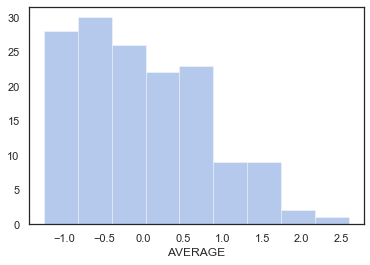

In [71]:
sns.set(style="white", palette="muted", color_codes=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df['AVERAGE'], kde=False, color="b")


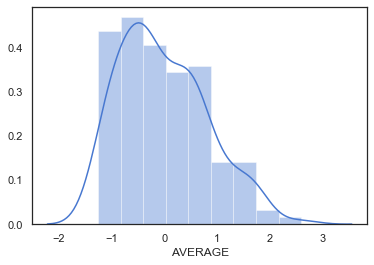

In [72]:
sns.distplot(df['AVERAGE'], kde=True, color="b")


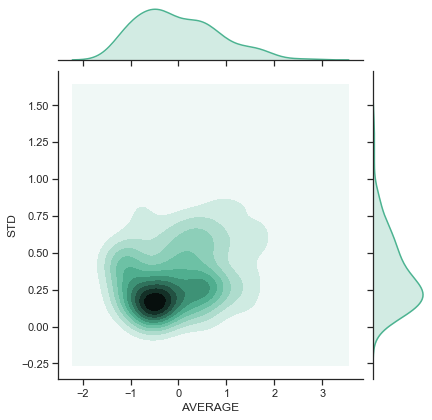

In [73]:
sns.set(style="ticks")

sns.jointplot(df['AVERAGE'], df['STD'],  kind="kde", color="#4CB391");

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


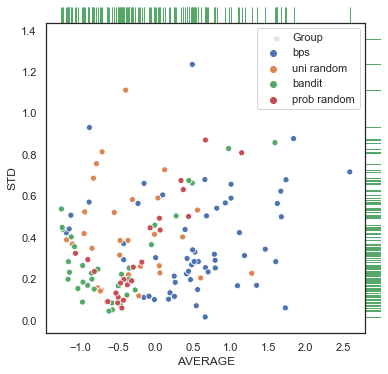

In [74]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df['AVERAGE'], df['STD'],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df['Group'])
grid.plot_marginals(sns.rugplot, height=1, color="g")

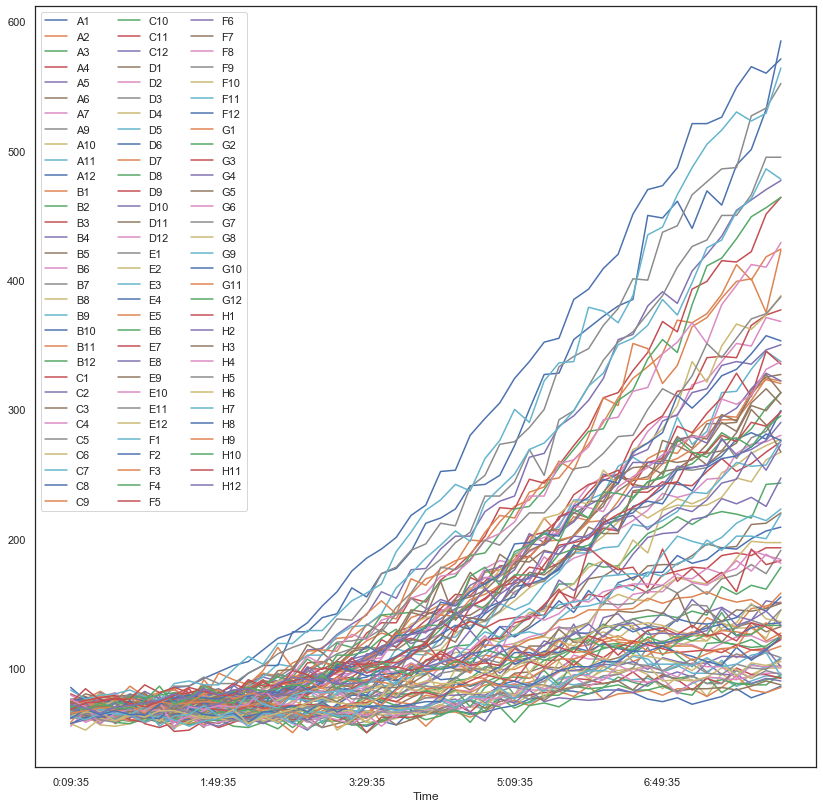

In [75]:
fig, ax = plt.subplots( figsize=(14,14))
df2.plot(ax = ax);
ax.legend(loc='upper left',ncol=3)

In [76]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3)
df3.iloc[1:].loc[df3['Base'] == "T"]

,Change_Pos,Base,AVERAGE,STD
4,2,T,2.592357,0.717515
8,3,T,2.592357,0.717515
14,4,T,1.625462,0.564901
18,5,T,0.527816,0.282055
22,6,T,0.570342,0.284792
26,7,T,0.248283,0.214209
30,8,T,0.658424,0.680425
34,9,T,-0.426195,0.371703
38,10,T,-1.130120,0.508253
42,11,T,-0.157164,0.111716


C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


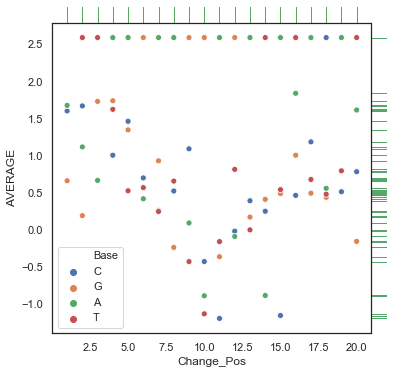

In [77]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df3['Change_Pos'].iloc[1:], df3['AVERAGE'].iloc[1:],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df3['Base'].iloc[1:])
grid.plot_marginals(sns.rugplot, height=1, color="g")

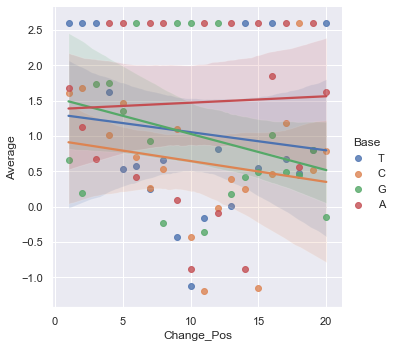

In [78]:
sns.set()
g = sns.lmplot(x ="Change_Pos", y= "AVERAGE",hue = "Base", height=5,data=df3,fit_reg=True)
g.set_axis_labels("Change_Pos", "Average")

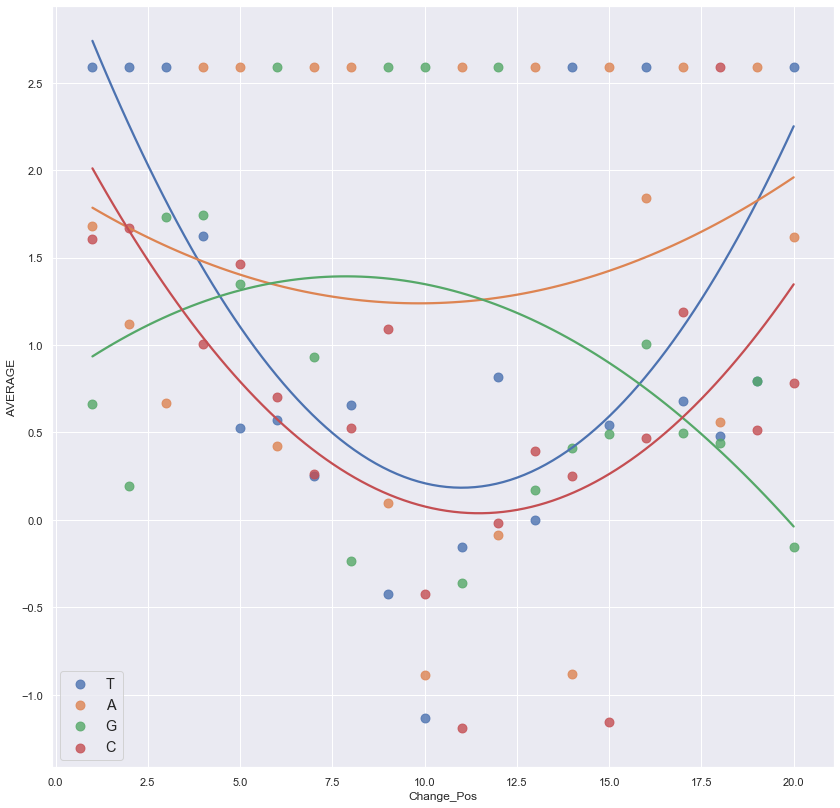

In [84]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C')
ax.legend(fontsize="large");

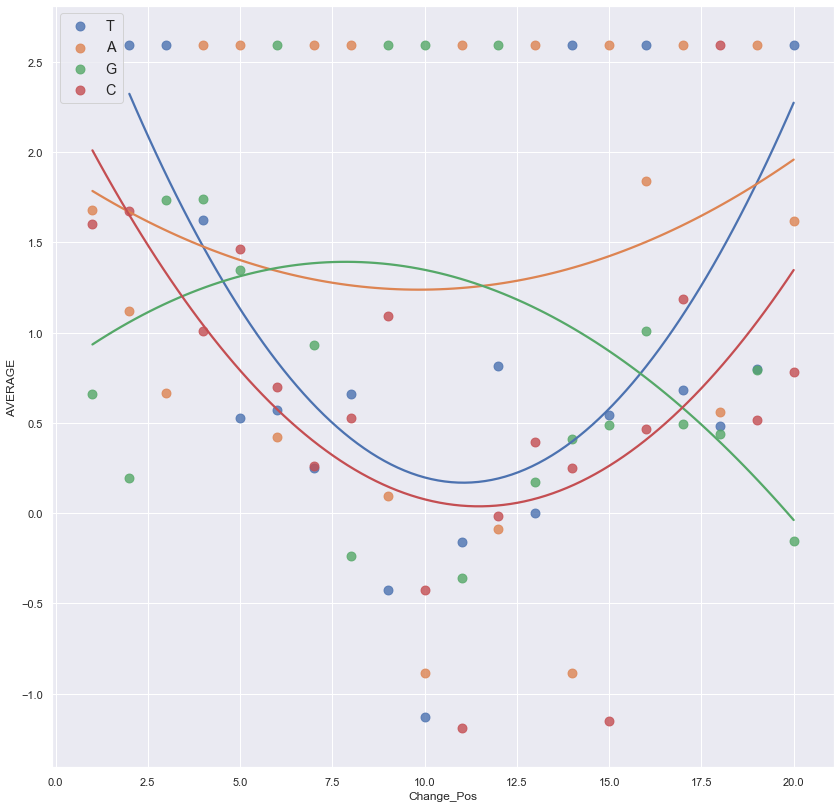

In [80]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[1:].loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[1:].loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[1:].loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[1:].loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C')
ax.legend(fontsize="large");

,Change_Pos,Base,AVERAGE,STD,RollingA,RollingT,RollingC,RollingG
0,1,T,2.592357,0.717515,NaN,NaN,NaN,NaN
1,1,C,1.604161,0.284382,NaN,NaN,NaN,NaN
2,1,G,0.662662,0.017069,NaN,NaN,NaN,NaN
3,1,A,1.678999,0.500712,NaN,NaN,NaN,NaN
4,2,T,2.592357,0.717515,NaN,NaN,NaN,NaN
5,2,C,1.671743,0.624388,NaN,NaN,NaN,NaN
6,2,G,0.192459,0.134037,NaN,NaN,NaN,NaN
7,2,A,1.119147,0.424237,NaN,NaN,NaN,NaN
8,3,T,2.592357,0.717515,NaN,NaN,NaN,NaN
9,3,G,1.732432,0.060987,NaN,NaN,NaN,NaN


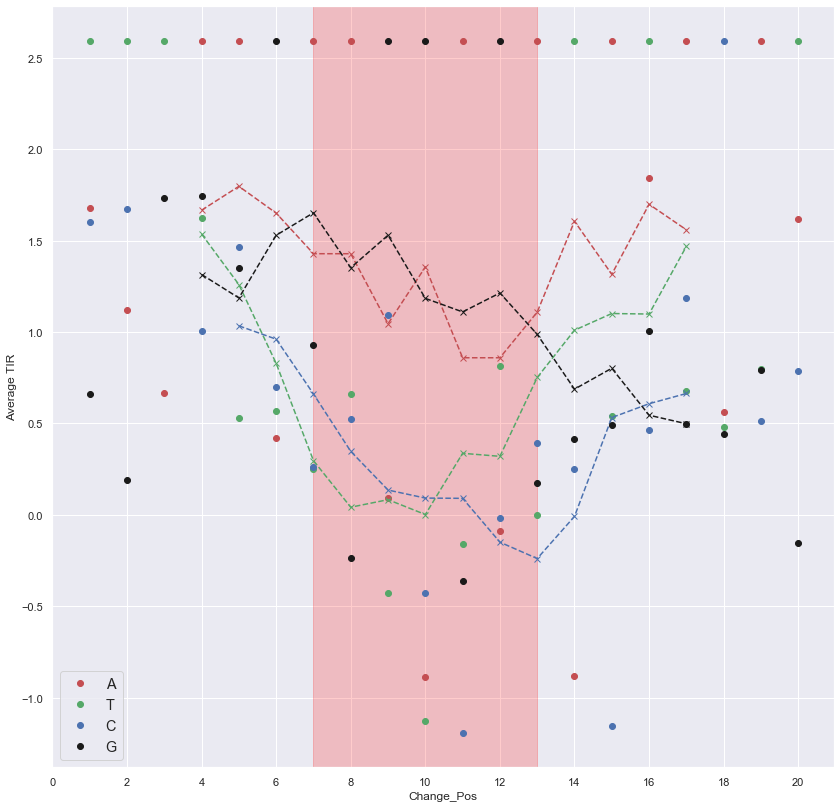

In [135]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3)
for base in 'ATCG':
    df3['Rolling' + base] = df3["AVERAGE"].loc[df3['Base'] == base].rolling(window=7,center=True).mean()
fig, ax = plt.subplots( figsize=(14,14))
for base,colour in zip('ATCG','rgbk'):
    ax1 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['AVERAGE'].loc[df3['Base'] == base],ls=None,marker='o',linewidth=0,c=colour,label=base)
    ax2 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['Rolling' + base].loc[df3['Base'] == base],ls='--',marker='x',c=colour)
plt.axvspan(7, 13, color='red', alpha=0.2)
ax.set_xlabel("Change_Pos");
plt.xticks(np.arange(0, 21, step=2))
ax.set_ylabel("Average TIR");
ax.legend(fontsize="large");

In [142]:
import statsmodels.api as sm

rlm_model = sm.RLM(  df3['Change_Pos'],df3['AVERAGE'], M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.params)

AVERAGE    4.436242
dtype: float64
